In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
import numpy as np

### Define Functions

In [27]:
def analyze_experiment_data(input_csv_path):
    """
    Analyze the experiment data from a given CSV file.
    
    Parameters:
        input_csv_path (str): The path to the input CSV file.
    
    Returns:
        pd.DataFrame: The filtered data.
    """
    # Read the CSV file
    data = pd.read_csv(input_csv_path)

    # Filter the relevant data
    filtered_data = data[data['Component Name'] == 'Rating Scale'][['Component Name', 'Participant Private ID', 'Spreadsheet: A', 'Spreadsheet: B', 'Response']]

    # Calculate the total number of participants
    total_participants = filtered_data['Participant Private ID'].nunique()

    # Calculate the trial number (total row number / total participant number)
    trial_number = len(filtered_data) // total_participants

    print(f"Total number of participants: {total_participants}")
    print(f"Trial number: {trial_number}")

    return filtered_data



def save_filtered_data_by_two_categories(filtered_data, category1_names, category2_names, output_dir, experiment_name, custom_name1, custom_name2):
    """
    Save the filtered data into a CSV file based on two given categories.
    
    Parameters:
        filtered_data (pd.DataFrame): The filtered data to categorize and save.
        category1_names (list): The list of names for the first category.
        category2_names (list): The list of names for the second category.
        output_dir (str): The directory where to save the CSV file.
        experiment_name (str): Name of the experiment for labeling the output CSV.
        custom_name1 (str): Custom name for category 1 in the saved CSV file.
        custom_name2 (str): Custom name for category 2 in the saved CSV file.
    """
    # Initialize empty list to hold filtered data
    filtered_category1 = []
    filtered_category2 = []

    # Set custom names if provided
    custom_name1 = custom_name1 if custom_name1 else 'category1'
    custom_name2 = custom_name2 if custom_name2 else 'category2'

    # Iterate through each row in filtered_data to categorize them
    for _, row in filtered_data.iterrows():
        A_name = row['Spreadsheet: A'].replace('.wav', '')
        B_name = row['Spreadsheet: B'].replace('.wav', '')
        
        if A_name in category1_names and B_name in category1_names:
            filtered_category1.append(row)
        elif A_name in category2_names and B_name in category2_names:
            filtered_category2.append(row)

    # Convert lists to dataframes
    filtered_category1_df = pd.DataFrame(filtered_category1)
    filtered_category2_df = pd.DataFrame(filtered_category2)
    print(f"Total number of rows for Category1: {filtered_category1_df.shape[0]}, Category2: {filtered_category2_df.shape[0]}")

    # Save to CSV
    filtered_category1_df.to_csv(f"{output_dir}/{experiment_name}_{custom_name1}.csv", index=False)
    filtered_category2_df.to_csv(f"{output_dir}/{experiment_name}_{custom_name2}.csv", index=False)



### 1. load result csv from 3 perceptual similarity experiment

In [28]:
#### 1.1 Complex tone vs Everyday sound (A)
pth_A = '/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/perceptual-similarity-complexTone_everydaySound/data/prolific-8-29/data_exp_141710-v5/data_exp_141710-v5_task-lwvw.csv'
filtered_data_A = analyze_experiment_data(pth_A)

#### 1.2 Complex tone vs Cat sound (B)
pth_B = '/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/perceptual-similarity-complexTone_catSound/data/prolific-8-31/data_exp_141796-v3/data_exp_141796-v3_task-lwvw.csv' 
filtered_data_B = analyze_experiment_data(pth_B)

#### 1.3 Everyday sound vs Cat sound (C)
pth_C = '/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/perceptual-similarity-everydaySound_catSound/data/prolific-8-29/data_exp_141798-v3/data_exp_141798-v3_task-lwvw.csv'
filtered_data_C = analyze_experiment_data(pth_C)

/var/folders/y9/0k_9rd192c3cw4x9z34p1_zr0000gn/T/ipykernel_23721/222157312.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_csv_path)
/var/folders/y9/0k_9rd192c3cw4x9z34p1_zr0000gn/T/ipykernel_23721/222157312.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_csv_path)


Total number of participants: 20
Trial number: 153
Total number of participants: 20
Trial number: 153
Total number of participants: 20
Trial number: 153


/var/folders/y9/0k_9rd192c3cw4x9z34p1_zr0000gn/T/ipykernel_23721/222157312.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_csv_path)


### 2. find the same category trials and save them as new csv files 6 in total (2 tasks * 3 categories)

In [29]:
# Define the name lists for each category
complex_tone_names = ['C4', 'D4', 'E4', 'Fs4_Gb4', 'G4', 'Gs4_Ab4', 'A4', 'Cs5_Db5', 'Ds5_Eb5']
everydaysound_names = ['baby_3ms', 'bell_3ms', 'frog_3ms', 'car_engine_3ms', 'cough_3ms', 'snore_3ms', 'sheep_3ms', 'sizzling_pan_3ms', 'laugh_3ms']
catsound_names = ['1_300ms','5_300ms','8_300ms','11_300ms','17_300ms','18_300ms','24_300ms','25_300ms','26_300ms']

# Save Directory
save_dir = '/Volumes/T7/CMU LiMN Research/perceptual organization/result & analysis/perceptual-similarity-bias_check/result'

#### 2.1 Complex tone vs Everyday sound (A)
save_filtered_data_by_two_categories(
    filtered_data_A, 
    complex_tone_names, 
    everydaysound_names, 
    save_dir,
    "ExperimentA",
    custom_name1="ComplexTone",
    custom_name2="EverydaySound"
)

#### 2.2 Complex tone vs Cat sound (B)
save_filtered_data_by_two_categories(
    filtered_data_B, 
    complex_tone_names, 
    catsound_names, 
    save_dir,
    "ExperimentB",
    custom_name1="ComplexTone",
    custom_name2="CatSound"
)

#### 2.3 Everyday sound vs Cat sound (C)
save_filtered_data_by_two_categories(
    filtered_data_C, 
    everydaysound_names, 
    catsound_names, 
    save_dir,
    "ExperimentC",
    custom_name1="EverydaySound",
    custom_name2="CatSound"
)


Total number of rows for Category1: 720, Category2: 720
Total number of rows for Category1: 720, Category2: 720
Total number of rows for Category1: 720, Category2: 720


#### 3.Response Bias Plots (one for each category)

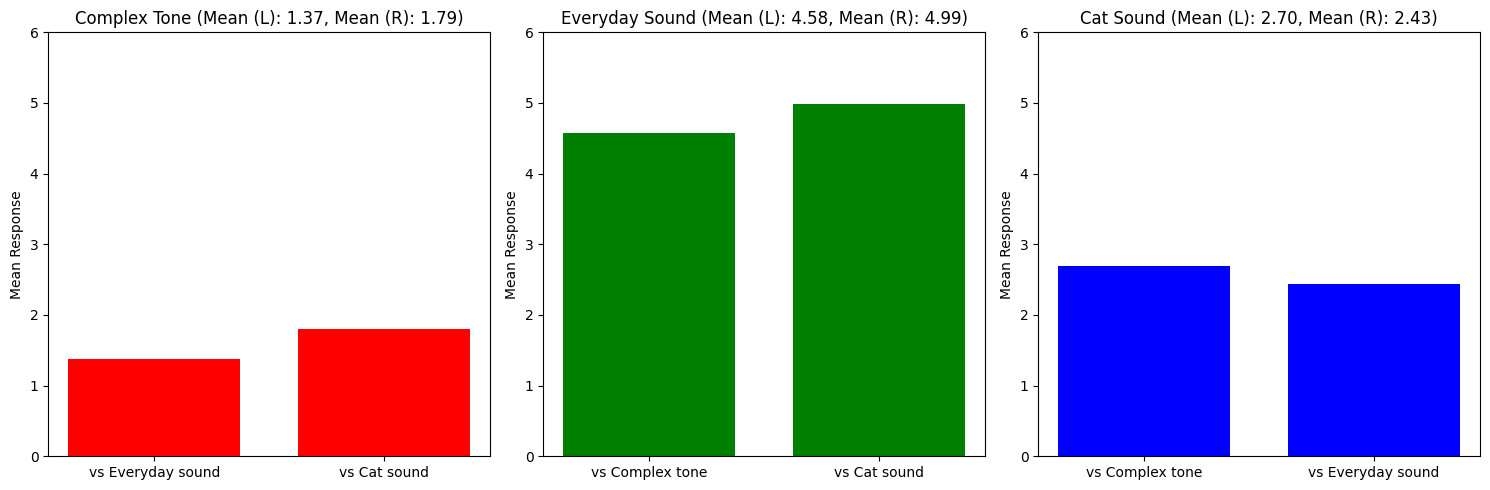

Mean for complex_tone_expA: 1.3736111111111111
Mean for complex_tone_expB: 1.7944444444444445
Mean for everydaysound_expA: 4.581944444444445
Mean for everydaysound_expC: 4.988888888888889
Mean for catsound_expB: 2.6958333333333333
Mean for catsound_expC: 2.4347222222222222


In [30]:
# Read the CSV files
complex_tone_expA = pd.read_csv(os.path.join(save_dir, "ExperimentA_ComplexTone.csv"))
complex_tone_expB = pd.read_csv(os.path.join(save_dir, "ExperimentB_ComplexTone.csv"))

everydaysound_expA = pd.read_csv(os.path.join(save_dir, "ExperimentA_EverydaySound.csv"))
everydaysound_expC = pd.read_csv(os.path.join(save_dir, "ExperimentC_EverydaySound.csv"))

catsound_expB = pd.read_csv(os.path.join(save_dir, "ExperimentB_CatSound.csv"))
catsound_expC = pd.read_csv(os.path.join(save_dir, "ExperimentC_CatSound.csv"))

# Calculate the mean for each DataFrame
mean_complex_tone_expA = complex_tone_expA['Response'].mean()
mean_complex_tone_expB = complex_tone_expB['Response'].mean()

mean_everydaysound_expA = everydaysound_expA['Response'].mean()
mean_everydaysound_expC = everydaysound_expC['Response'].mean()

mean_catsound_expB = catsound_expB['Response'].mean()
mean_catsound_expC = catsound_expC['Response'].mean()

# Create bar plots
plt.figure(figsize=(15, 5))
bar_positions = [0.3, 0.7]
width = 0.3

# Plot for Complex Tone
plt.subplot(1, 3, 1)
plt.bar(bar_positions, [mean_complex_tone_expA, mean_complex_tone_expB], color='r', width = width)
plt.xticks(bar_positions, ['vs Everyday sound', 'vs Cat sound'])
plt.title(f'Complex Tone (Mean (L): {mean_complex_tone_expA:.2f}, Mean (R): {mean_complex_tone_expB:.2f})')
plt.ylabel('Mean Response')
plt.ylim(0, 6)

# Plot for Everyday Sound
plt.subplot(1, 3, 2)
plt.bar(bar_positions, [mean_everydaysound_expA, mean_everydaysound_expC], color='g', width = width)
plt.xticks(bar_positions, ['vs Complex tone', 'vs Cat sound'])
plt.title(f'Everyday Sound (Mean (L): {mean_everydaysound_expA:.2f}, Mean (R): {mean_everydaysound_expC:.2f})')
plt.ylabel('Mean Response')
plt.ylim(0, 6)

# Plot for Cat Sound
plt.subplot(1, 3, 3)
plt.bar(bar_positions, [mean_catsound_expB, mean_catsound_expC], color='b', width = width)
plt.xticks(bar_positions, ['vs Complex tone', 'vs Everyday sound'])
plt.title(f'Cat Sound (Mean (L): {mean_catsound_expB:.2f}, Mean (R): {mean_catsound_expC:.2f})')
plt.ylabel('Mean Response')
plt.ylim(0, 6)

# Show plots
plt.tight_layout()

# Save the plot to the specified directory
plot_path = os.path.join(save_dir, "category_comparison_bar_plots.png")
plt.savefig(plot_path)

# Show the plot
plt.show()

# Print the means
print("Mean for complex_tone_expA:", mean_complex_tone_expA)
print("Mean for complex_tone_expB:", mean_complex_tone_expB)

print("Mean for everydaysound_expA:", mean_everydaysound_expA)
print("Mean for everydaysound_expC:", mean_everydaysound_expC)

print("Mean for catsound_expB:", mean_catsound_expB)
print("Mean for catsound_expC:", mean_catsound_expC)

In [31]:
# Calculate the standard deviation for each DataFrame
stdev_complex_tone_expA = complex_tone_expA['Response'].std()
stdev_complex_tone_expB = complex_tone_expB['Response'].std()

stdev_everydaysound_expA = everydaysound_expA['Response'].std()
stdev_everydaysound_expC = everydaysound_expC['Response'].std()

stdev_catsound_expB = catsound_expB['Response'].std()
stdev_catsound_expC = catsound_expC['Response'].std()

# Compute the ratios within each experiment
ratio_expA = stdev_everydaysound_expA / stdev_complex_tone_expA
ratio_expB = stdev_catsound_expB / stdev_complex_tone_expB 
ratio_expC = stdev_everydaysound_expC / stdev_catsound_expC 

# Print the standard deviations
print(f"Standard Deviation for Complex Tone in Experiment A: {stdev_complex_tone_expA:.2f}")
print(f"Standard Deviation for Complex Tone in Experiment B: {stdev_complex_tone_expB:.2f}")

print(f"Standard Deviation for Everyday Sound in Experiment A: {stdev_everydaysound_expA:.2f}")
print(f"Standard Deviation for Everyday Sound in Experiment C: {stdev_everydaysound_expC:.2f}")

print(f"Standard Deviation for Cat Sound in Experiment B: {stdev_catsound_expB:.2f}")
print(f"Standard Deviation for Cat Sound in Experiment C: {stdev_catsound_expC:.2f}")

# Print the computed ratios
print(f"Ratio in Experiment A (Everyday Sound to Complex Tone): {ratio_expA:.2f}")
print(f"Ratio in Experiment B (Cat Sound to Complex Tone): {ratio_expB:.2f}")
print(f"Ratio in Experiment C (Everyday Sound to Cat Sound): {ratio_expC:.2f}")


Standard Deviation for Complex Tone in Experiment A: 1.17
Standard Deviation for Complex Tone in Experiment B: 1.32
Standard Deviation for Everyday Sound in Experiment A: 1.59
Standard Deviation for Everyday Sound in Experiment C: 1.61
Standard Deviation for Cat Sound in Experiment B: 1.26
Standard Deviation for Cat Sound in Experiment C: 1.74
Ratio in Experiment A (Everyday Sound to Complex Tone): 1.36
Ratio in Experiment B (Cat Sound to Complex Tone): 0.96
Ratio in Experiment C (Everyday Sound to Cat Sound): 0.93


### 4. statistical t test

In [32]:
# Conduct t-test for Complex Tones between Experiment A and B
t_stat_complex, p_val_complex = ttest_ind(complex_tone_expA['Response'], complex_tone_expB['Response'])
print(f"Complex Tones (ExpA vs. ExpB) - t-statistic: {t_stat_complex}, p-value: {p_val_complex}")

# Conduct t-test for Everyday Sounds between Experiment A and C
t_stat_everyday, p_val_everyday = ttest_ind(everydaysound_expA['Response'], everydaysound_expC['Response'])
print(f"Everyday Sounds (ExpA vs. ExpC) - t-statistic: {t_stat_everyday}, p-value: {p_val_everyday}")

# Conduct t-test for Cat Sounds between Experiment B and C
t_stat_cat, p_val_cat = ttest_ind(catsound_expB['Response'], catsound_expC['Response'])
print(f"Cat Sounds (ExpB vs. ExpC) - t-statistic: {t_stat_cat}, p-value: {p_val_cat}")

#repeated t test

Complex Tones (ExpA vs. ExpB) - t-statistic: -6.41181459412368, p-value: 1.9455382125221062e-10
Everyday Sounds (ExpA vs. ExpC) - t-statistic: -4.820665454235116, p-value: 1.5825064212363794e-06
Cat Sounds (ExpB vs. ExpC) - t-statistic: 3.2588922536767853, p-value: 0.0011446146382948885


### repeated measure t test

In [33]:
## Complex tone vs Everyday sound

# Compute the mean response for each participant for both complex_tone and everydaysound
complex_tone_means = complex_tone_expA.groupby("Participant Private ID")["Response"].mean()
everydaysound_means = everydaysound_expA.groupby("Participant Private ID")["Response"].mean()

# Merge the two series based on Participant Private ID to make sure we compare the same participants
merged_means = pd.merge(complex_tone_means, everydaysound_means, on="Participant Private ID", how="inner", suffixes=('_complex', '_everyday'))

# Conduct a paired sample t-test (repeated measures) for each matched participant
t_stat, p_val = ttest_rel(merged_means['Response_complex'], merged_means['Response_everyday'])

print(f"t-statistic: {t_stat}, p-value: {p_val}")

# Calculate the differences between the paired observations
differences = merged_means['Response_complex'] - merged_means['Response_everyday']

# Calculate the mean and standard deviation of the differences
mean_diff = differences.mean()
std_diff = differences.std()

# Compute Cohen's d
cohens_d = mean_diff / std_diff

print(f"Cohen's d: {cohens_d}")

t-statistic: -14.782839826012802, p-value: 7.111582027226565e-12
Cohen's d: -3.3055434751455786


In [34]:
# Complex tone vs Cat sound
# Compute the mean response for each participant for both complex_tone and catsound
complex_tone_means = complex_tone_expB.groupby("Participant Private ID")["Response"].mean()
catsound_means = catsound_expB.groupby("Participant Private ID")["Response"].mean()

# Merge the two series based on Participant Private ID to make sure we compare the same participants
merged_means = pd.merge(complex_tone_means, catsound_means, on="Participant Private ID", how="inner", suffixes=('_complex', '_catsound'))

# Conduct a paired sample t-test (repeated measures) for each matched participant
t_stat, p_val = ttest_rel(merged_means['Response_complex'], merged_means['Response_catsound'])

print(f"t-statistic: {t_stat}, p-value: {p_val}")

# Calculate the differences between the paired observations
differences = merged_means['Response_complex'] - merged_means['Response_catsound']

# Calculate the mean and standard deviation of the differences
mean_diff = differences.mean()
std_diff = differences.std()

# Compute Cohen's d
cohens_d = mean_diff / std_diff

print(f"Cohen's d: {cohens_d}")


t-statistic: -5.891306550895816, p-value: 1.1317832573139397e-05
Cohen's d: -1.317336192409287


In [35]:
# Everyday vs Cat Sound
# Compute the mean response for each participant for both everydaysound and catsound
everydaysound_means = everydaysound_expC.groupby("Participant Private ID")["Response"].mean()
catsound_means = catsound_expC.groupby("Participant Private ID")["Response"].mean()

# Merge the two series based on Participant Private ID to make sure we compare the same participants
merged_means = pd.merge(everydaysound_means, catsound_means, on="Participant Private ID", how="inner", suffixes=('_everyday', '_catsound'))

# Conduct a paired sample t-test (repeated measures) for each matched participant
t_stat, p_val = ttest_rel(merged_means['Response_everyday'], merged_means['Response_catsound'])

print(f"t-statistic: {t_stat}, p-value: {p_val}")

# Calculate the differences between the paired observations
differences = merged_means['Response_everyday'] - merged_means['Response_catsound']

# Calculate the mean and standard deviation of the differences
mean_diff = differences.mean()
std_diff = differences.std()

# Compute Cohen's d
cohens_d = mean_diff / std_diff

print(f"Cohen's d: {cohens_d}")


t-statistic: 6.503517872772047, p-value: 3.1340763644061015e-06
Cohen's d: 1.4542308056403124


Complex tones were rated significantly lower than everyday sounds (negative t-statistic for the comparison between complex tones and everyday sounds).
Complex tones were also rated significantly lower than cat sounds (negative t-statistic for the comparison between complex tones and cat sounds).
However, everyday sounds were rated significantly higher than cat sounds (positive t-statistic for the comparison between everyday sounds and cat sounds).
Given these comparisons, it suggests that the ranking in terms of ratings is:

Complex tones < Cat sounds < Everyday sounds



### plot box plot

In [36]:
# Complex tone vs Everyday sound
means_complex_tone_expA = complex_tone_expA.groupby("Participant Private ID")["Response"].mean()
means_everydaysound_expA = everydaysound_expA.groupby("Participant Private ID")["Response"].mean()

# Complex tone vs Cat sound
means_complex_tone_expB = complex_tone_expB.groupby("Participant Private ID")["Response"].mean()
means_catsound_expB = catsound_expB.groupby("Participant Private ID")["Response"].mean()

# Everyday sound vs Cat sound
means_everydaysound_expC = everydaysound_expC.groupby("Participant Private ID")["Response"].mean()
means_catsound_expC = catsound_expC.groupby("Participant Private ID")["Response"].mean()

# Merge data
data_all_means = [means_complex_tone_expA, means_everydaysound_expA, means_complex_tone_expB, 
                  means_catsound_expB, means_everydaysound_expC, means_catsound_expC]

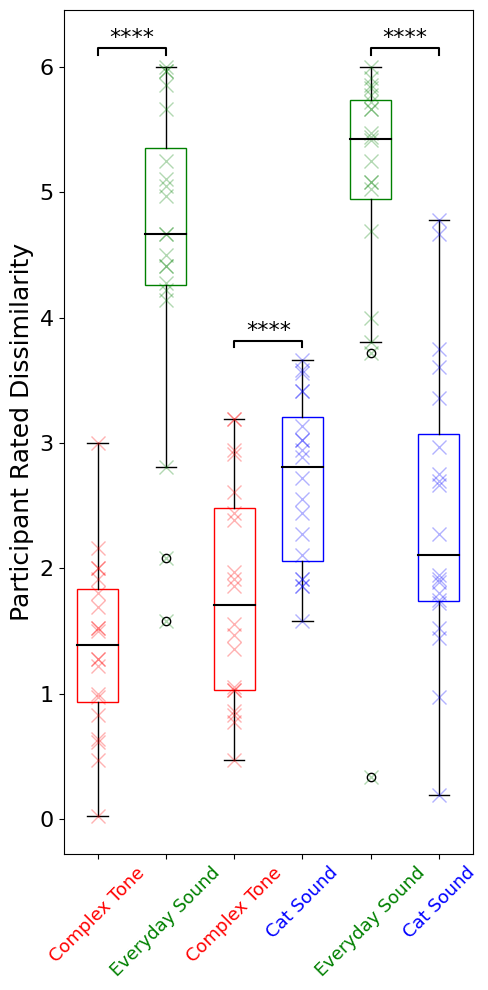

In [37]:
# Define a function to get colors based on labels
def get_color(label):
    color_map = {
        'Complex Tone': 'red',
        'Everyday Sound': 'green',
        'Cat Sound': 'blue'
    }
    return color_map[label]

# Function to add the statistical annotation
def add_stat_annotation(ax, x1, x2, y, p_val, cohen_d):
    ax.plot([x1, x1, x2, x2], [y, y + 0.05, y + 0.05, y], color='black')
    ax.text((x1 + x2) * .5, y + 0.05, f"P < {p_val:.2e}\nCohen's d: {cohen_d:.2f}", ha='center', va='bottom', fontsize=16)

# Function to add the statistical annotation
def add_stat_annotation2(ax, x1, x2, y, str):
    ax.plot([x1, x1, x2, x2], [y, y + 0.05, y + 0.05, y], color='black')
    ax.text((x1 + x2) * .5, y + 0.05, str, ha='center', va='bottom', fontsize=16)


# Plotting
fig, ax = plt.subplots(figsize=(5, 10))
positions = list(range(1, 7))
labels = ['Complex Tone', 'Everyday Sound', 'Complex Tone', 'Cat Sound', 'Everyday Sound', 'Cat Sound']

# Box plots
boxes = ax.boxplot(data_all_means, positions=positions, vert=True, patch_artist=True, widths=0.6)
for patch, label in zip(boxes['boxes'], labels):
    patch.set_facecolor('none')  # No fill
    patch.set_edgecolor(get_color(label))  # Color the boundary

# Set median color to black
for median in boxes['medians']:
    median.set_color('black')
    median.set_linewidth(1.5)

# Scatter plots
for i, data, label in zip(range(1, 7), data_all_means, labels):
    y = data
    #x = np.random.normal(i, 0.04, size=len(y))
    x = [i] * len(y)
    ax.plot(x, y, 'x', markersize=10, alpha=0.3, color=get_color(label))

# X-axis labels and colors
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=13)
for label in ax.get_xticklabels():
    label.set_color(get_color(label.get_text()))

# Y-axis label
ax.set_ylabel('Participant Rated Dissimilarity', fontsize=18)
ax.tick_params(axis='y', labelsize=16)

# Adding the statistical annotations
# Getting the maximum y-value among the categories being compared to place the annotation just above them
y_max_1 = max(max(data_all_means[0]), max(data_all_means[1]))
y_max_2 = max(max(data_all_means[2]), max(data_all_means[3]))
y_max_3 = max(max(data_all_means[4]), max(data_all_means[5]))

add_stat_annotation2(ax, 1, 2, y_max_1 + 0.1, '****') # 7.111582027226565e-12, -3.31)
add_stat_annotation2(ax, 3, 4, y_max_2 + 0.1, '****') # 1.1317832573139397e-05, -1.32)
add_stat_annotation2(ax, 5, 6, y_max_3 + 0.1, '****') # 3.1340763644061015e-06, 1.45)

# # Labeling experiments A, B, C
# exp_positions = [1.5, 3.5, 5.5]
# exp_labels = ['Experiment 1a', 'Experiment 1b', 'Experiment 1c']
# for pos, label in zip(exp_positions, exp_labels):
#     ax.text(pos, ax.get_ylim()[0] - 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0]), 
#             label, ha='center', fontsize=16, color='black')

plt.tight_layout()
plt.show()


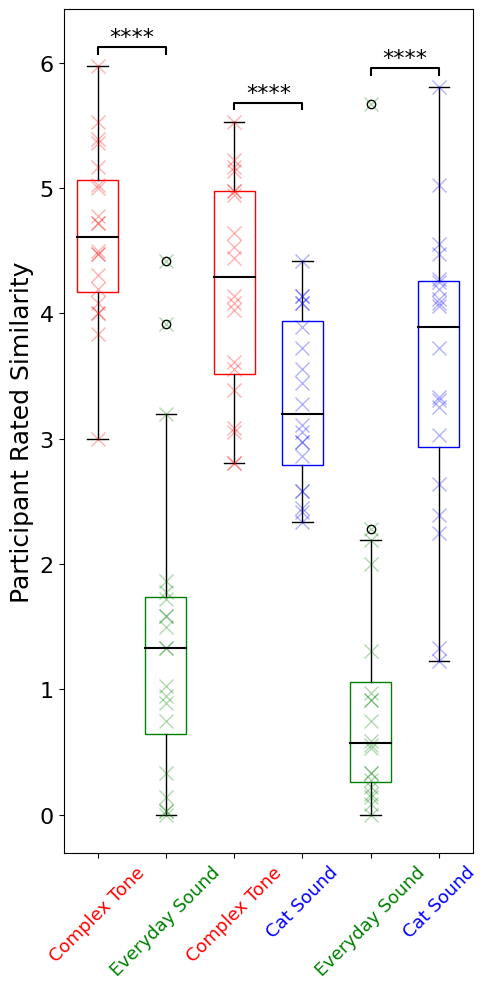

In [38]:
# Invert the data values for both the boxplots and scatter plots
data_all_means_inverted = [[6 - value for value in sublist] for sublist in data_all_means]

# Plotting
fig, ax = plt.subplots(figsize=(5, 10))
positions = list(range(1, 7))
labels = ['Complex Tone', 'Everyday Sound', 'Complex Tone', 'Cat Sound', 'Everyday Sound', 'Cat Sound']

# Box plots
boxes = ax.boxplot(data_all_means_inverted, positions=positions, vert=True, patch_artist=True, widths=0.6)
for patch, label in zip(boxes['boxes'], labels):
    patch.set_facecolor('none')  # No fill
    patch.set_edgecolor(get_color(label))  # Color the boundary

# Set median color to black
for median in boxes['medians']:
    median.set_color('black')
    median.set_linewidth(1.5)

# Scatter plots
for i, data, label in zip(range(1, 7), data_all_means_inverted, labels):
    y = data
    x = [i] * len(y)
    ax.plot(x, y, 'x', markersize=10, alpha=0.3, color=get_color(label))

# X-axis labels and colors
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=13)
for label in ax.get_xticklabels():
    label.set_color(get_color(label.get_text()))

# Y-axis label
ax.set_ylabel('Participant Rated Similarity', fontsize=18)
ax.tick_params(axis='y', labelsize=16)

# Adding the statistical annotations
y_max_1 = max(max(data_all_means_inverted[0]), max(data_all_means_inverted[1]))
y_max_2 = max(max(data_all_means_inverted[2]), max(data_all_means_inverted[3]))
y_max_3 = max(max(data_all_means_inverted[4]), max(data_all_means_inverted[5]))

add_stat_annotation2(ax, 1, 2, y_max_1 + 0.1, '****')
add_stat_annotation2(ax, 3, 4, y_max_2 + 0.1, '****')
add_stat_annotation2(ax, 5, 6, y_max_3 + 0.1, '****')

save_path = os.path.join('/Volumes/T7/CMU LiMN Research/Perceptual Organization/ARO conference/Poster plot', "crossCategory_rating.svg")
# save the plot
plt.savefig(save_path, format='svg')
plt.tight_layout()
plt.show()
